#Mengambil Data dari Kaggle


In [ ]:
!pip install kaggle
!pip install tensorflow
!pip install matplotlib

In [ ]:
from google.colab import files
files.upload()

Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"mariefrahmanhakim","key":"978216a1adec02c69df8530e6e71af63"}'}

In [ ]:
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print('Train images shape:', x_train.shape)
print('Train labels shape:', y_train.shape)

print('Test images shape:', x_test.shape)
print('Test labels shape:', y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


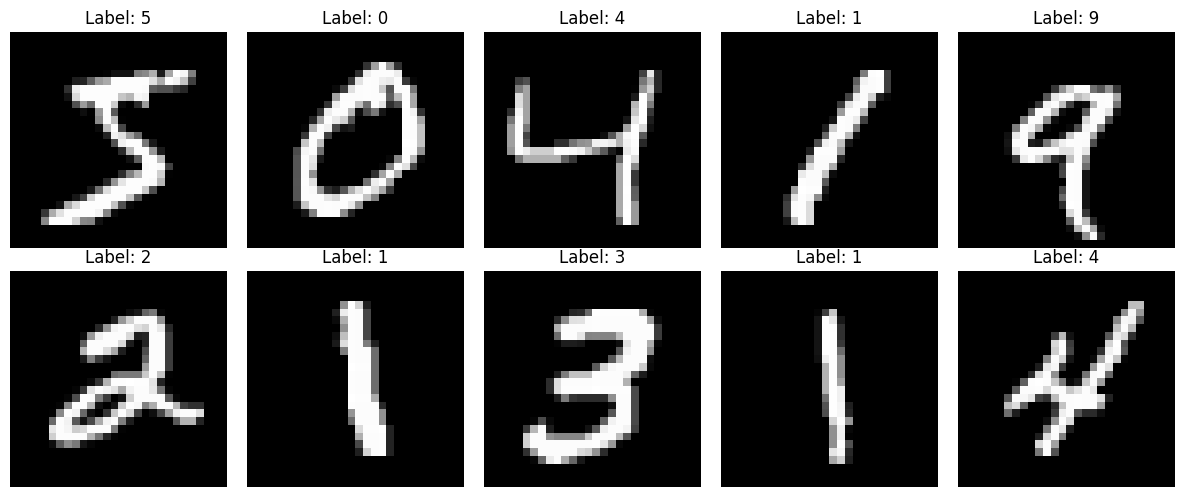

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

(x_train, y_train), (_, _) = tf.keras.datasets.mnist.load_data()

# Tampilkan beberapa gambar dari dataset MNIST
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
axes = axes.ravel()

for i in range(10):
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].set_title(f'Label: {y_train[i]}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

#Import Library

In [ ]:
!pip install kaggle
!pip install tensorflow
!pip install idx2numpy


  Preparing metadata (setup.py) ... done
  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-py3-none-any.whl size=7904 sha256=232993a3eb6995bd7f3ccabc20f4782cba896532b8757221dea497aedeabcc92
  Stored in directory: /root/.cache/pip/wheels/87/e5/e7/70fc742b3645ddf9d392f766feccbcc95cb3a3c806f8588af0
Successfully built idx2numpy


#Preprocessing Data

In [ ]:
import numpy as np

##Missing Value Check

In [ ]:
def check_missing_values(data, name):
    missing_values = np.isnan(data).sum()
    print(f"Missing values in {name}:", missing_values)

check_missing_values(x_train, "x_train")
check_missing_values(y_train, "y_train")
check_missing_values(x_test, "x_test")
check_missing_values(y_test, "y_test")

Missing values in x_train: 0
Missing values in y_train: 0
Missing values in x_test: 0
Missing values in y_test: 0


##Duplicate Data Check

In [ ]:
def check_duplicates(data, name):
    unique_data = np.unique(data, axis=0)
    duplicates = data.shape[0] - unique_data.shape[0]
    print(f"Duplicates in {name}:", duplicates)

check_duplicates(x_train, "x_train")
check_duplicates(y_train, "y_train")
check_duplicates(x_test, "x_test")
check_duplicates(y_test, "y_test")

Duplicates in x_train: 0
Duplicates in y_train: 59990
Duplicates in x_test: 0
Duplicates in y_test: 9990


In [ ]:
import numpy as np

unique_labels, label_counts = np.unique(y_train, return_counts=True)

print("Unique labels:", unique_labels)
print("Count per label:", label_counts)


Unique labels: [0 1 2 3 4 5 6 7 8 9]
Count per label: [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]


##Normalisasi Data

In [ ]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

##Reshaping Data

In [ ]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

##One-hot Encoding Label

In [ ]:
y_train_cat = tf.keras.utils.to_categorical(y_train, 10)
y_test_cat = tf.keras.utils.to_categorical(y_test, 10)

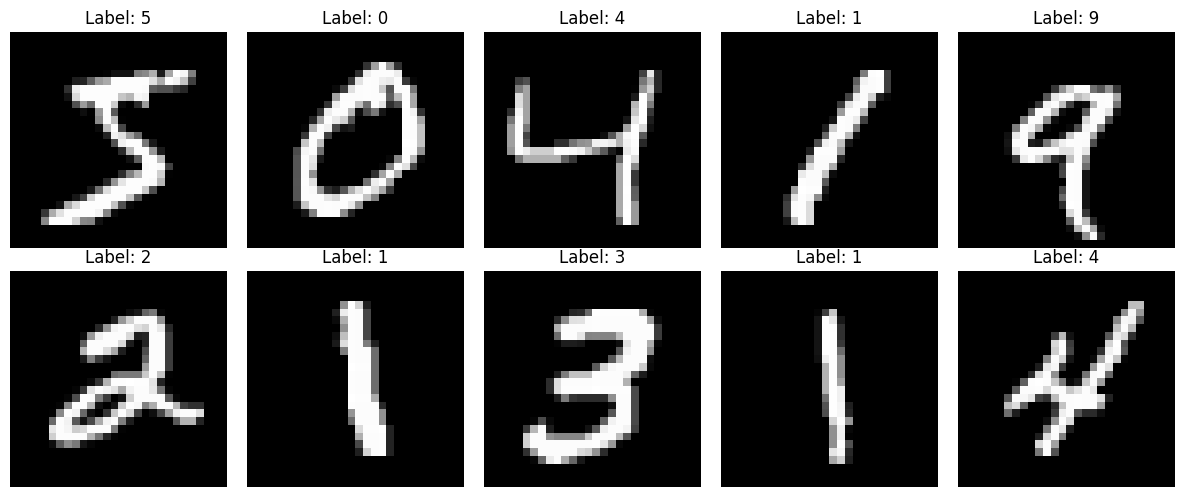

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
axes = axes.ravel()

for i in range(10):
    axes[i].imshow(x_train[i].squeeze(), cmap='gray')
    axes[i].set_title(f'Label: {y_train[i]}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

#Pembagungan, Pelatihan, dan Perbandingan Model

##Percobaan 1

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Callbacks
ES = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, verbose=2, restore_best_weights=True, mode='max', min_delta=0)
MC = tf.keras.callbacks.ModelCheckpoint(filepath='Best_model.keras', monitor='val_accuracy', verbose=2, save_best_only=True, mode='max')
RP = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=5, verbose=2, min_lr=0.0001, factor=0.2)

In [ ]:
# Compile Model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001))

### Evaluasi Model 1

In [ ]:
history = model.fit(x_train, y_train_cat, validation_data=(x_test, y_test_cat), epochs=50, callbacks=[ES, MC, RP])

Epoch 1/50
1870/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9102 - loss: 0.2882
Epoch 1: val_accuracy improved from -inf to 0.98650, saving model to Best_model.keras
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9104 - loss: 0.2877 - val_accuracy: 0.9865 - val_loss: 0.0428 - learning_rate: 0.0010
Epoch 2/50
1874/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9857 - loss: 0.0459
Epoch 2: val_accuracy improved from 0.98650 to 0.99020, saving model to Best_model.keras
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9857 - loss: 0.0459 - val_accuracy: 0.9902 - val_loss: 0.0287 - learning_rate: 0.0010
Epoch 3/50
1857/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9910 - loss: 0.0296
Epoch 3: val_accuracy did not improve from 0.99020
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9910 - loss: 0.0296 - val_accuracy: 0.9902 - val_loss: 0.0342 - learning_rate: 0.0010
Epoch 4/50
1859/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9939 - loss:

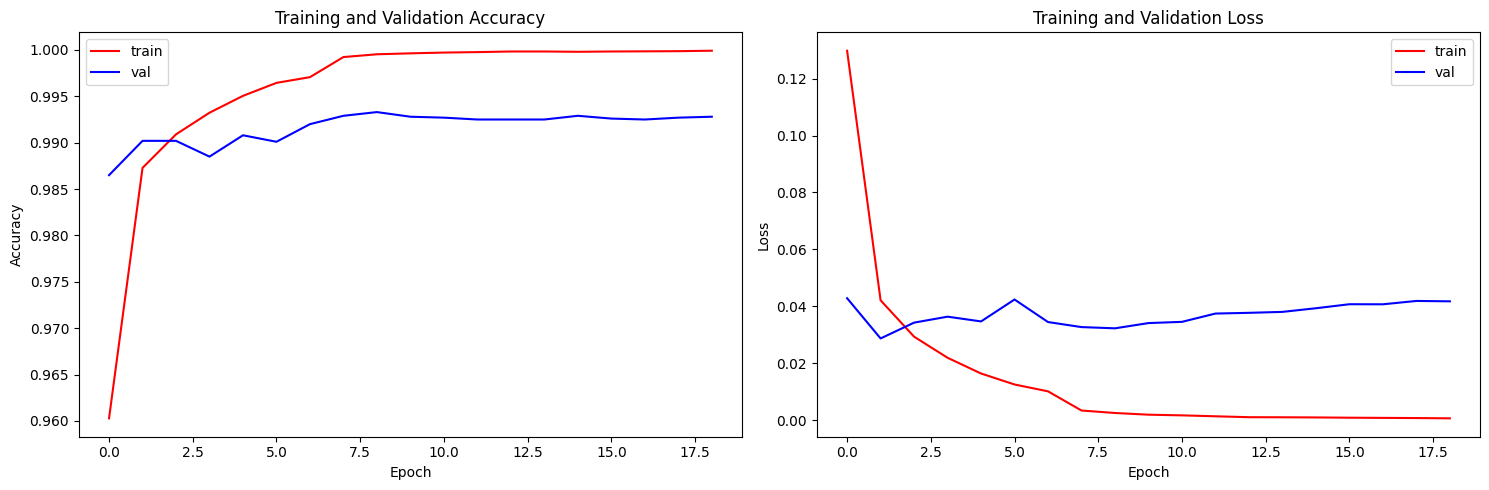

In [ ]:
# Plot Training & Validation Accuracy and Loss dalam 1 Baris
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].plot(history.history['accuracy'], 'r', label='train')
axes[0].plot(history.history['val_accuracy'], 'b', label='val')
axes[0].set_title('Training and Validation Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

axes[1].plot(history.history['loss'], 'r', label='train')
axes[1].plot(history.history['val_loss'], 'b', label='val')
axes[1].set_title('Training and Validation Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


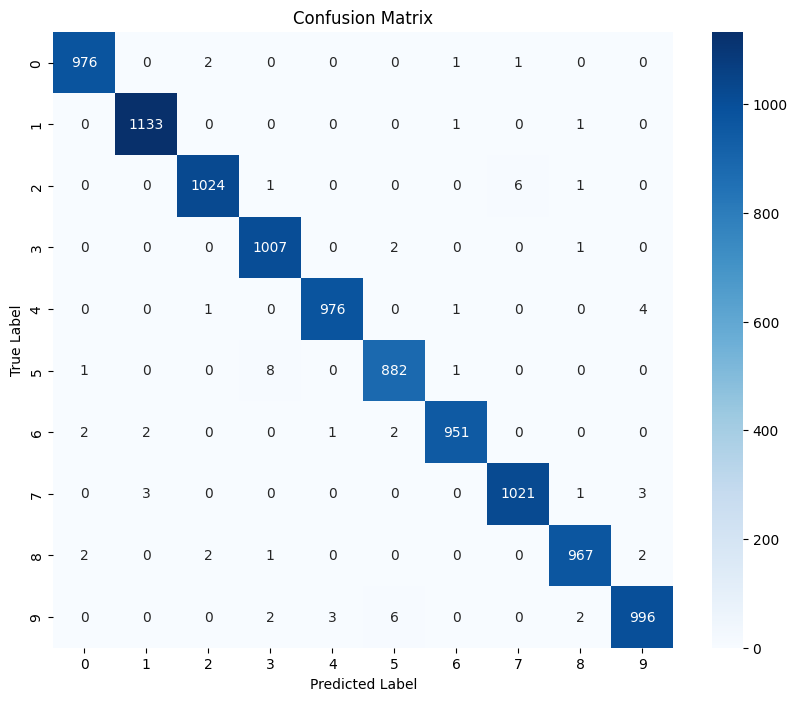

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       1.00      1.00      1.00      1135
           2       1.00      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

predictions = model.predict(x_test)
y_pred = np.argmax(predictions, axis=1)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

##Percobaan 2

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

### Evaluasi Model 2

In [ ]:
history = model.fit(x_train, y_train_cat, epochs=50, validation_data=(x_test, y_test_cat), batch_size=128, callbacks=[early_stop])

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.4480 - loss: 1.5867 - val_accuracy: 0.8932 - val_loss: 0.3523
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9001 - loss: 0.3304 - val_accuracy: 0.9315 - val_loss: 0.2340
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9369 - loss: 0.2150 - val_accuracy: 0.9563 - val_loss: 0.1450
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9557 - loss: 0.1478 - val_accuracy: 0.9658 - val_loss: 0.1070
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9656 - loss: 0.1103 - val_accuracy: 0.9718 - val_loss: 0.0884
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9717 - loss: 0.0943 - val_accuracy: 0.9714 - val_loss: 0.0879
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9737 - loss: 0.0857 - val_accuracy: 0.9766 - val_loss: 0.0725
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9768 - loss: 0.0748 - val_accuracy: 0.

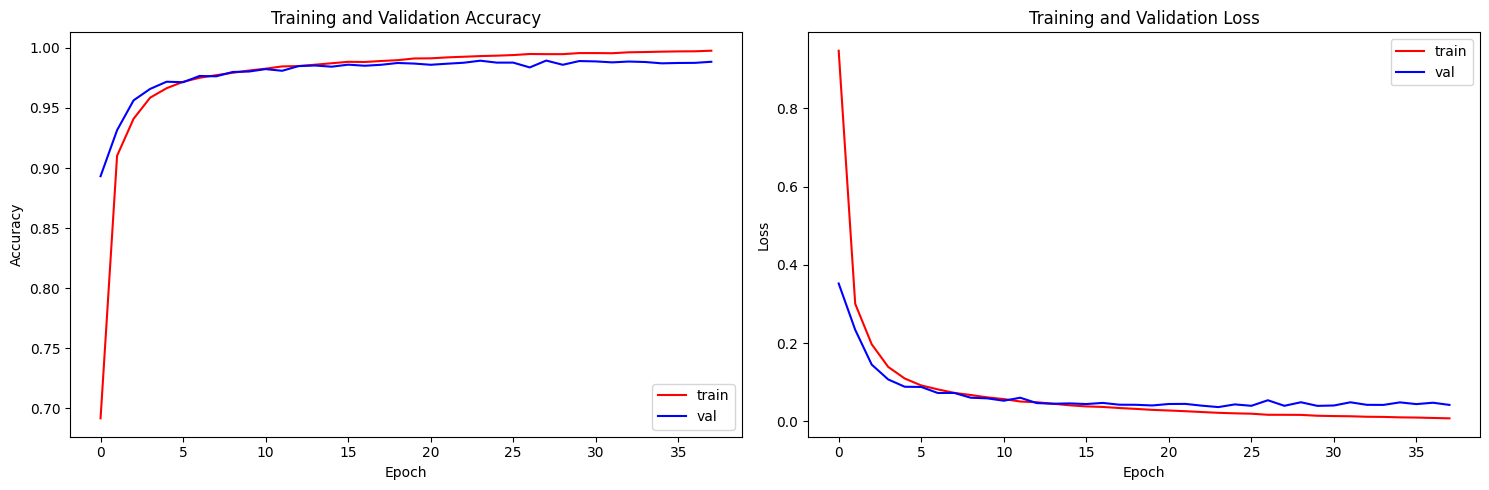

In [ ]:
# Plot Training & Validation Accuracy and Loss dalam 1 Baris
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].plot(history.history['accuracy'], 'r', label='train')
axes[0].plot(history.history['val_accuracy'], 'b', label='val')
axes[0].set_title('Training and Validation Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

axes[1].plot(history.history['loss'], 'r', label='train')
axes[1].plot(history.history['val_loss'], 'b', label='val')
axes[1].set_title('Training and Validation Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


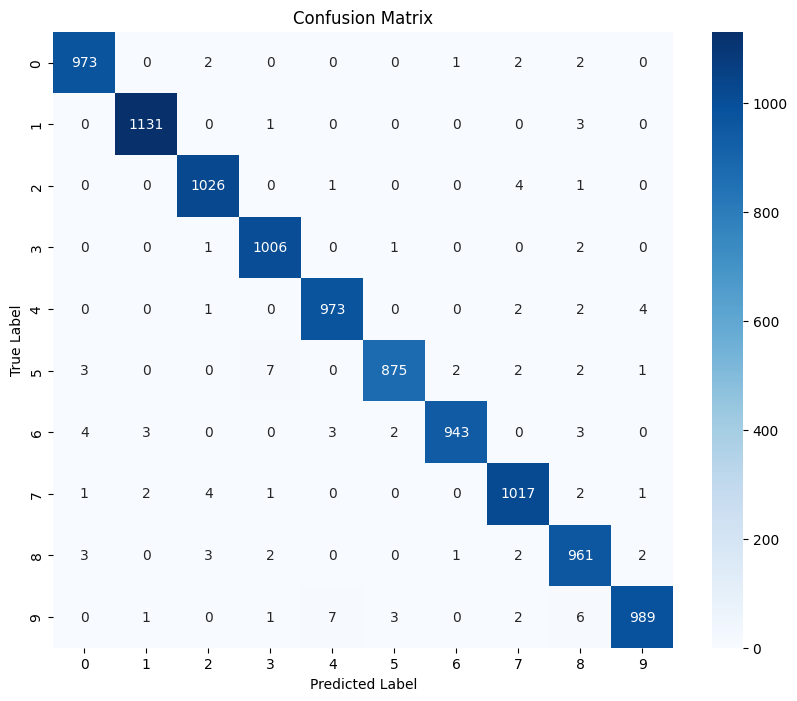

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       1.00      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.98      0.99      0.98       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

predictions = model.predict(x_test)
y_pred = np.argmax(predictions, axis=1)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

##Percobaan 3

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Callbacks
ES = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, verbose=2, restore_best_weights=True, mode='max', min_delta=0)
MC = tf.keras.callbacks.ModelCheckpoint(filepath='Best_model.keras', monitor='val_accuracy', verbose=2, save_best_only=True, mode='max')
RP = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=5, verbose=2, min_lr=0.0001, factor=0.2)

In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005))

### Evaluasi Model 3

In [ ]:
history = model.fit(x_train, y_train_cat, validation_data=(x_test, y_test_cat), epochs=50, batch_size=128, callbacks=[ES, MC, RP])

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8851 - loss: 0.3793
Epoch 1: val_accuracy improved from -inf to 0.93540, saving model to Best_model.keras
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.8852 - loss: 0.3788 - val_accuracy: 0.9354 - val_loss: 0.2265 - learning_rate: 5.0000e-04
Epoch 2/50
458/469 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9821 - loss: 0.0584
Epoch 2: val_accuracy improved from 0.93540 to 0.98890, saving model to Best_model.keras
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9822 - loss: 0.0584 - val_accuracy: 0.9889 - val_loss: 0.0369 - learning_rate: 5.0000e-04
Epoch 3/50
468/469 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9885 - loss: 0.0386
Epoch 3: val_accuracy improved from 0.98890 to 0.98980, saving model to Best_model.keras
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9885 - loss: 0.0386 - val_accuracy: 0.9898 - val_loss: 0.0281 - learning_rate: 5.0000e-04
Epoch 4/50
459/469 ━━━━━━━━━━━━━━━━━━━━

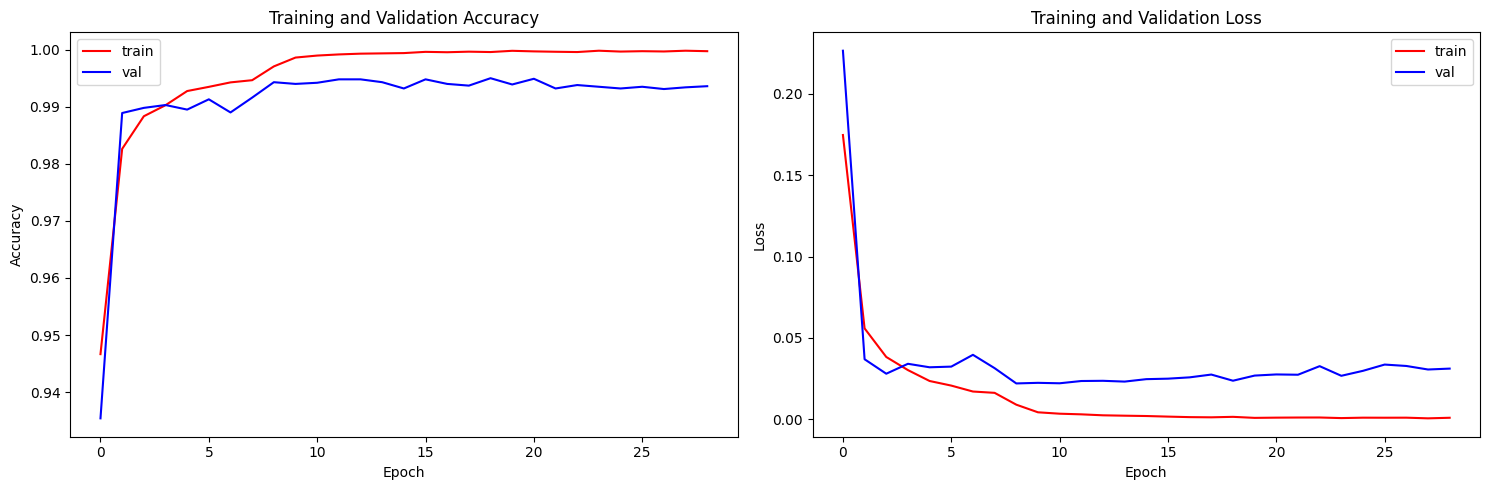

In [ ]:
# Plot Training & Validation Accuracy and Loss dalam 1 Baris
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].plot(history.history['accuracy'], 'r', label='train')
axes[0].plot(history.history['val_accuracy'], 'b', label='val')
axes[0].set_title('Training and Validation Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

axes[1].plot(history.history['loss'], 'r', label='train')
axes[1].plot(history.history['val_loss'], 'b', label='val')
axes[1].set_title('Training and Validation Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


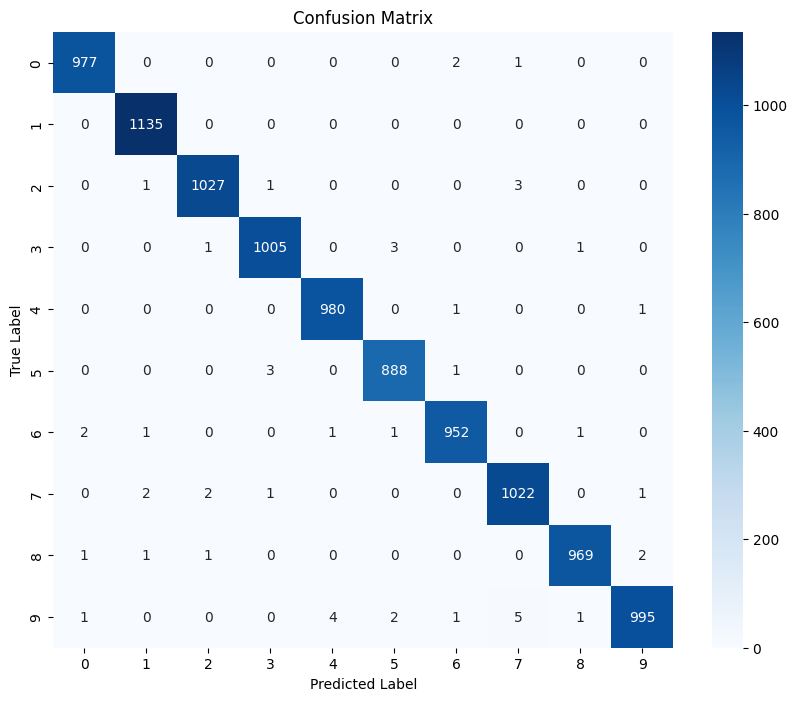

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      1.00      1.00      1135
           2       1.00      1.00      1.00      1032
           3       1.00      1.00      1.00      1010
           4       0.99      1.00      1.00       982
           5       0.99      1.00      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.99      1.00       974
           9       1.00      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       1.00      0.99      0.99     10000



In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

predictions = model.predict(x_test)
y_pred = np.argmax(predictions, axis=1)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Overall Accuracy: {accuracy * 100:.2f}%')

Overall Accuracy: 99.50%
